## Import Libraries 

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

import utils

## Load and Pre-process the white wine dataset
You will now load the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [2]:
URI = 'wine+quality/winequality-white.csv'
white_df = pd.read_csv(URI, delimiter=';')
white_df['is_red'] = 0
white_df = white_df.drop_duplicates(keep='first')

In [3]:
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

8.8
9.1


In [5]:
URI = 'wine+quality/winequality-red.csv'
red_df = pd.read_csv(URI, delimiter=';')
red_df['is_red'] = 1
red_df = red_df.drop_duplicates(keep='first')

In [6]:
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [7]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

9.4
10.2


In [8]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [10]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
9.5


In [11]:
# shuffle the dataset
df = df.iloc[np.random.permutation(len(df))]

<Axes: >

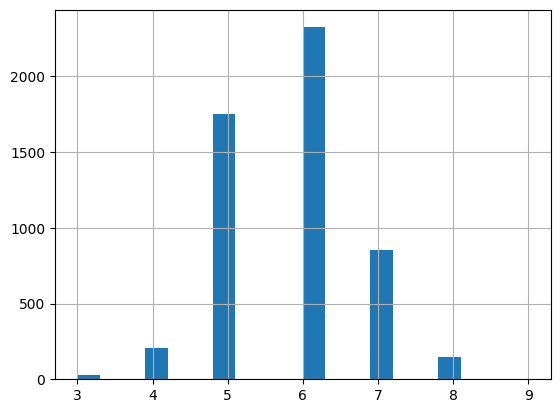

In [12]:
df['quality'].hist(bins=20)

### Imbalanced data
You can see from the plot above that the wine quality dataset is imbalanced. 
- Since there are very few observations with quality equal to 3, 4, 8 and 9, you can drop these observations from your dataset. 
- You can do this by removing data belonging to all classes except those > 4 and < 8.

In [13]:
df = df[(df['quality'] > 4) & (df['quality'] < 8)]
df = df.reset_index(drop=True)

In [14]:
print(df.alcohol[0])
print(df.alcohol[100])

9.2
12.0


<Axes: >

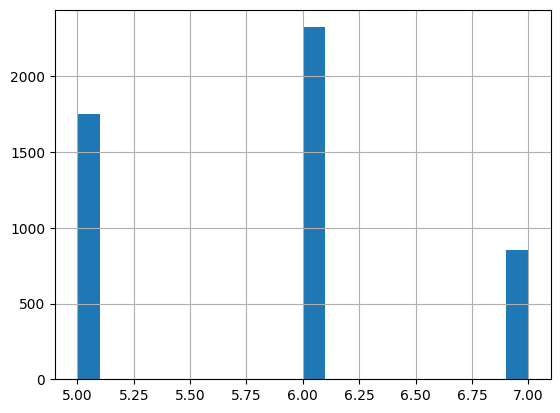

In [15]:
df['quality'].hist(bins=20)

## Train Test Split

In [16]:
train, test = train_test_split(df, test_size= 0.2, random_state=1)
train, val = train_test_split(train, test_size=0.2, random_state=1) 

In [17]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

In [18]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.208162,1.307044,3.80000,6.40000,7.00000,7.7000,15.90000
volatile acidity,3155.0,0.340884,0.165360,0.08000,0.23000,0.29000,0.4100,1.33000
citric acid,3155.0,0.318732,0.145418,0.00000,0.24000,0.31000,0.4000,1.00000
residual sugar,3155.0,5.050444,4.603931,0.60000,1.80000,2.70000,7.5000,65.80000
chlorides,3155.0,0.057080,0.036610,0.00900,0.03800,0.04700,0.0670,0.61100
free sulfur dioxide,3155.0,30.363391,17.129002,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,114.897464,56.011478,6.00000,77.00000,117.00000,154.0000,344.00000
density,3155.0,0.994568,0.002995,0.98711,0.99224,0.99471,0.9968,1.03898
pH,3155.0,3.222919,0.157647,2.74000,3.12000,3.21000,3.3200,3.90000
sulphates,3155.0,0.534906,0.149477,0.22000,0.43500,0.51000,0.6100,1.98000


## Get the labels

In [19]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [20]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)

In [21]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.7,0.200,0.44,13.9,0.050,44.0,130.0,0.99855,3.11,0.48,10.0
3557,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7
3825,6.2,0.470,0.21,1.0,0.044,13.0,98.0,0.99345,3.14,0.46,9.2
1740,6.8,0.190,0.33,1.3,0.031,22.0,87.0,0.98987,3.08,0.62,12.3
1221,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0


In [22]:
def norm(x):
    return (x - train_stats['mean'])/ train_stats['std']

In [23]:
# normalize the train set
norm_train_X = norm(train)
    
# normalize the val set
norm_val_X = norm(val)
    
# normalize the test set
norm_test_X = norm(test)

## Define the Model

In [24]:
def base_model(inputs):
    x = Dense(units=128, activation='relu', name='first_base_dense')(inputs)
    x = Dense(units=128, activation='relu', name='second_base_dense')(x)
    return x

In [25]:
def final_model(inputs):
    x = base_model(inputs)
    wine_quality = Dense(units=1, name='wine_quality')(x)
    wine_type = Dense(units=1, activation='sigmoid', name='wine_type')(x)
    model = Model(inputs=inputs, outputs=[wine_quality, wine_type])
    return model

## Compiling the Model

In [26]:
inputs = Input(shape=(len(train.columns),))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)
plot_model(model, show_shapes=True, show_layer_names=True, to_file='final-model.png')

model.compile(optimizer=rms, 
              loss={'wine_type': tf.keras.losses.binary_crossentropy,
                    'wine_quality': tf.keras.losses.mse},
              metrics={'wine_type': 'accuracy',
                       'wine_quality': tf.keras.metrics.RootMeanSquaredError()})

## Training the Model

In [27]:
history = model.fit(train, train_Y,
                    epochs=40, validation_data=(val, val_Y))

Epoch 1/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 20.5496 - wine_quality_loss: 19.6182 - wine_quality_root_mean_squared_error: 4.0664 - wine_type_accuracy: 0.5135 - wine_type_loss: 0.9310 - val_loss: 1.4191 - val_wine_quality_loss: 1.0230 - val_wine_quality_root_mean_squared_error: 1.0110 - val_wine_type_accuracy: 0.7693 - val_wine_type_loss: 0.3951
Epoch 2/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2248 - wine_quality_loss: 0.8739 - wine_quality_root_mean_squared_error: 0.9345 - wine_type_accuracy: 0.8204 - wine_type_loss: 0.3508 - val_loss: 0.9566 - val_wine_quality_loss: 0.6856 - val_wine_quality_root_mean_squared_error: 0.8261 - val_wine_type_accuracy: 0.9138 - val_wine_type_loss: 0.2725
Epoch 3/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9459 - wine_quality_loss: 0.6856 - wine_quality_root_mean_squared_error: 0.8276 - wine_type_accuracy: 0.9192 - wine_type_loss: 0.2603 - val_loss: 0.6740 - val_wine_quality_loss: 0.4439 - val_wine_quality_root_mean_squared_

In [28]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.9159 - wine_quality_loss: 32.3975 - wine_quality_root_mean_squared_error: 5.6918 - wine_type_accuracy: 0.8453 - wine_type_loss: 0.5178 

loss: 32.84501266479492
wine_quality_loss: 32.31105041503906
wine_type_loss: 0.5257519483566284
wine_quality_rmse: 5.685075759887695
wine_type_accuracy: 0.8403041958808899


## Analyze the Model Performance

In [29]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
print(quality_pred[0])

[-0.01648798]


In [31]:
print(type_pred[0])
print(type_pred[944])

[0.88707465]
[0.38149858]


In [32]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


In [33]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(test_Y[1], np.round(type_pred), labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=[0, 1])
    disp.plot(values_format='d');

In [34]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

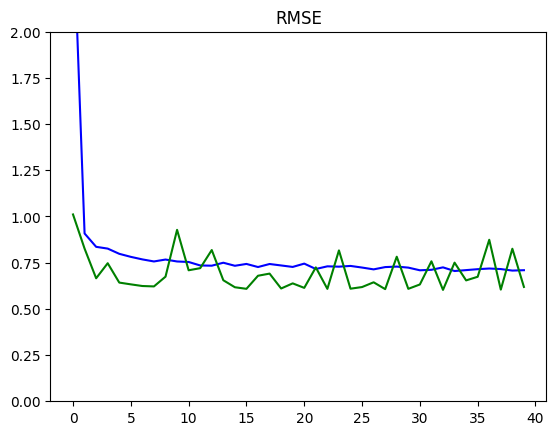

In [35]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

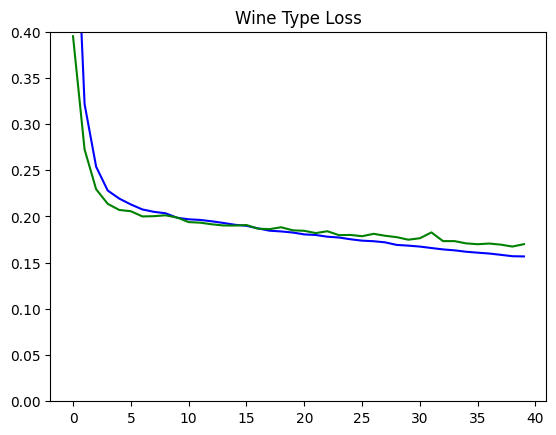

In [36]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.4)

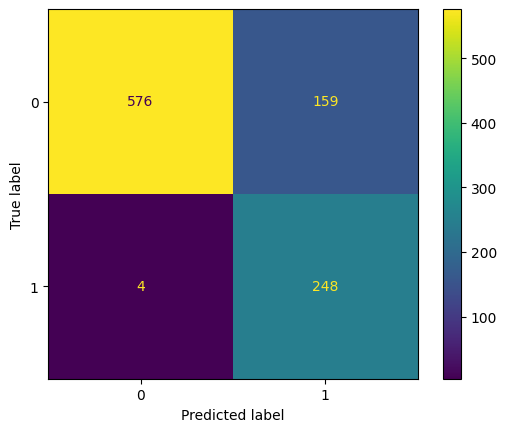

In [37]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

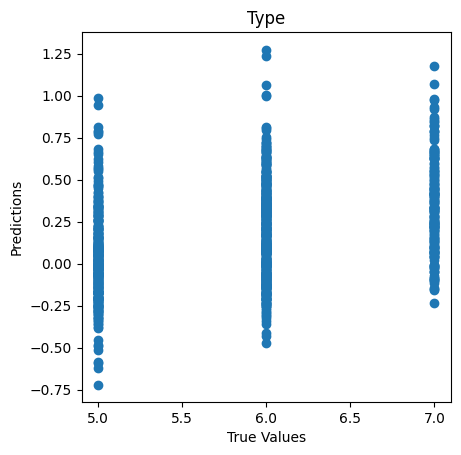

In [38]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')